左足マーカー数: 4
[2805, 28335, 239800, 250199]
右足マーカー数: 4
[2840, 28356, 239854, 250162]


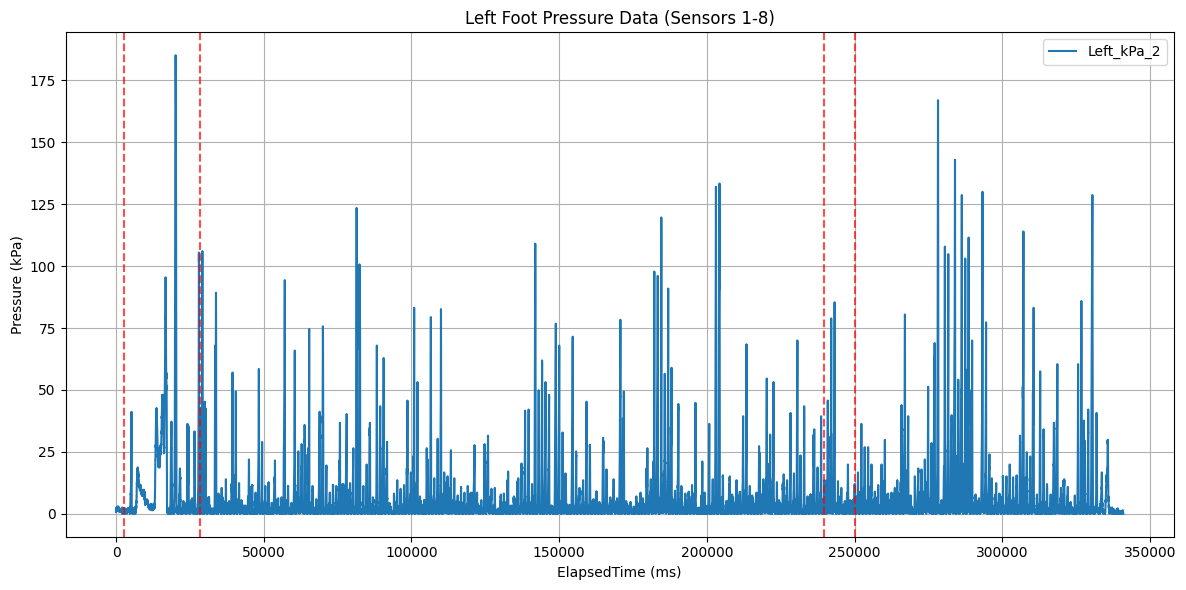

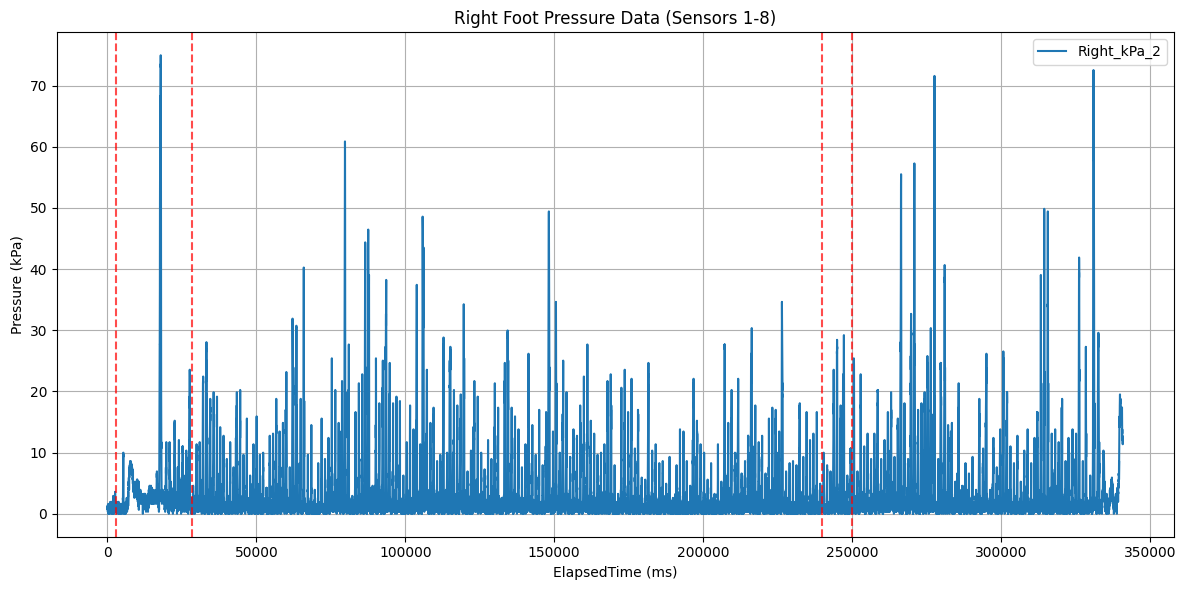

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
left_filename = "WearableDevices/yanaze_h_left_foot_data.csv"
df_left = pd.read_csv(left_filename)
right_filename = "WearableDevices/yanaze_h_right_foot_data.csv"
df_right = pd.read_csv(right_filename)

# 横軸：ElapsedTime
time_left = df_left['ElapsedTime']
time_right = df_right['ElapsedTime']

# マーカーが記録されている時刻を取得（0でない，かつNaNでない行）
marker_times_left = df_left[(df_left['Marker'].notna()) & (df_left['Marker'] != 0)]['ElapsedTime']
marker_times_right = df_right[(df_right['Marker'].notna()) & (df_right['Marker'] != 0)]['ElapsedTime']

print(f"左足マーカー数: {len(marker_times_left)}")
print(marker_times_left.tolist())
print(f"右足マーカー数: {len(marker_times_right)}")
print(marker_times_right.tolist())



# 1. 足圧センサーデータ（kPa_1～8）- 左足
kpa_cols = ['kPa_2']
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
for t in marker_times_left:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
# plt.xlim(40000,50000)
plt.ylabel('Pressure (kPa)')
plt.title('Left Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. 足圧センサーデータ（kPa_1～8）- 右足
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
for t in marker_times_right:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
# plt.xlim(40000,50000)
plt.ylabel('Pressure (kPa)')
plt.title('Right Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# # 2. 加速度データ - 左足
# accel_cols = ['Accel_X', 'Accel_Y', 'Accel_Z']

# plt.figure(figsize=(12, 5))
# for col in accel_cols:
#     plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
# for t in marker_times_left:
#     plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
# plt.xlabel('ElapsedTime (ms)')
# plt.ylabel('Acceleration (g)')
# plt.title('Left Foot Acceleration Data (Accel_X/Y/Z)')
# plt.legend(loc='best')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # 2. 加速度データ - 右足
# plt.figure(figsize=(12, 5))
# for col in accel_cols:
#     plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
# for t in marker_times_right:
#     plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
# plt.xlabel('ElapsedTime (ms)')
# plt.xlim(30000,50000)
# plt.ylabel('Acceleration (g)')
# plt.title('Right Foot Acceleration Data (Accel_X/Y/Z)')
# plt.legend(loc='best')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # 3. 角速度データ - 左足
# gyro_cols = ['Gyro_X', 'Gyro_Y', 'Gyro_Z']

# plt.figure(figsize=(12, 5))
# for col in gyro_cols:
#     plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
# for t in marker_times_left:
#     plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
# plt.xlabel('ElapsedTime (ms)')
# plt.ylabel('Angular Velocity (deg/s)')
# plt.title('Left Foot Gyroscope Data (Gyro_X/Y/Z)')
# plt.legend(loc='best')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # 3. 角速度データ - 右足
# plt.figure(figsize=(12, 5))
# for col in gyro_cols:
#     plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
# for t in marker_times_right:
#     plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
# plt.xlabel('ElapsedTime (ms)')
# plt.ylabel('Angular Velocity (deg/s)')
# plt.title('Right Foot Gyroscope Data (Gyro_X/Y/Z)')
# plt.legend(loc='best')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [21]:
import numpy as np # NaNを入れるために必要であれば

# --- ここから追記・修正部分 ---

def filter_markers(df):
    # マーカーが記録されている（0でない，かつNaNでない）行のインデックスを取得
    # 元のコードのロジックに合わせて 0 も除外対象としています
    marker_indices = df[(df['Marker'].notna()) & (df['Marker'] != 0)].index
    
    # 3つ目以降（リストのインデックス2以降）が存在する場合、その箇所のMarkerをNaNにする
    if len(marker_indices) > 2:
        # 3つ目以降のインデックスを取得
        indices_to_remove = marker_indices[2:]
        # 指定したインデックスのMarker列をNaNに書き換え
        df.loc[indices_to_remove, 'Marker'] = float('nan')
    
    return df

# 左足のデータを処理
df_left = filter_markers(df_left)

# 右足のデータを処理
df_right = filter_markers(df_right)

# --- 結果の確認 ---

# 再度マーカー時刻を取得して確認
marker_times_left_new = df_left[(df_left['Marker'].notna()) & (df_left['Marker'] != 0)]['ElapsedTime']
marker_times_right_new = df_right[(df_right['Marker'].notna()) & (df_right['Marker'] != 0)]['ElapsedTime']

print(f"修正後の左足マーカー数: {len(marker_times_left_new)}")
print(marker_times_left_new.tolist())
print(f"修正後の右足マーカー数: {len(marker_times_right_new)}")
print(marker_times_right_new.tolist())

修正後の左足マーカー数: 2
[2805, 28335]
修正後の右足マーカー数: 2
[2840, 28356]


In [22]:
# 保存するファイル名を定義
left_output_filename = "WearableDevices/yanaze_h_left_foot_data_A.csv"
right_output_filename = "WearableDevices/yanaze_h_right_foot_data_A.csv"

# CSVとして保存
# index=False にすることで、Pandasの行番号（0, 1, 2...）がCSVの1列目に入るのを防ぎます
df_left.to_csv(left_output_filename, index=False)
df_right.to_csv(right_output_filename, index=False)

print(f"保存完了: {left_output_filename}")
print(f"保存完了: {right_output_filename}")

保存完了: WearableDevices/yanaze_h_left_foot_data_A.csv
保存完了: WearableDevices/yanaze_h_right_foot_data_A.csv


左足マーカー数: 2
[2805, 28335]
右足マーカー数: 2
[2840, 28356]


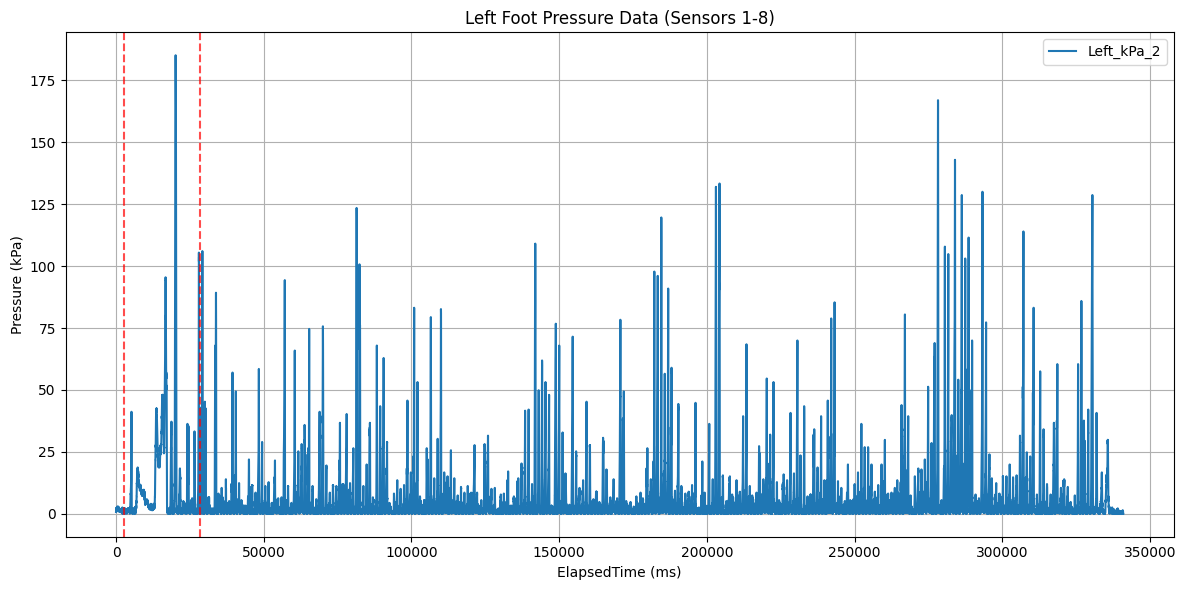

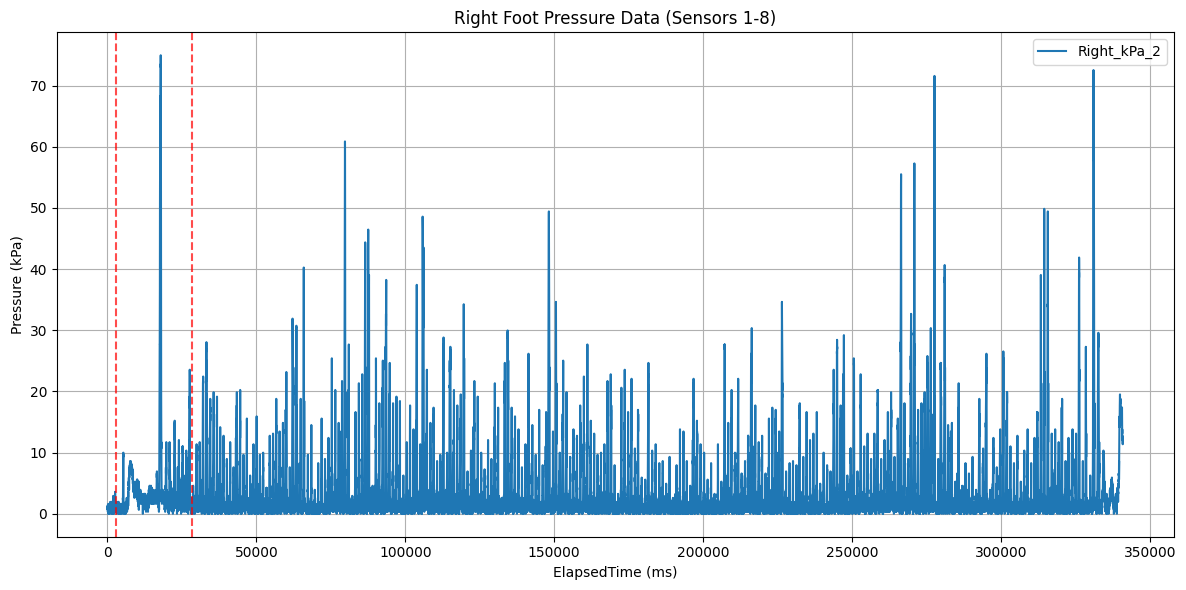

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
left_filename = "WearableDevices/yanaze_h_left_foot_data_A.csv"
df_left = pd.read_csv(left_filename)
right_filename = "WearableDevices/yanaze_h_right_foot_data_A.csv"
df_right = pd.read_csv(right_filename)

# 横軸：ElapsedTime
time_left = df_left['ElapsedTime']
time_right = df_right['ElapsedTime']

# マーカーが記録されている時刻を取得（0でない，かつNaNでない行）
marker_times_left = df_left[(df_left['Marker'].notna()) & (df_left['Marker'] != 0)]['ElapsedTime']
marker_times_right = df_right[(df_right['Marker'].notna()) & (df_right['Marker'] != 0)]['ElapsedTime']

print(f"左足マーカー数: {len(marker_times_left)}")
print(marker_times_left.tolist())
print(f"右足マーカー数: {len(marker_times_right)}")
print(marker_times_right.tolist())



# 1. 足圧センサーデータ（kPa_1～8）- 左足
kpa_cols = ['kPa_2']
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_left, df_left[f'Left_{col}'], label=f'Left_{col}')
for t in marker_times_left:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
# plt.xlim(40000,50000)
plt.ylabel('Pressure (kPa)')
plt.title('Left Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. 足圧センサーデータ（kPa_1～8）- 右足
plt.figure(figsize=(12, 6))
for col in kpa_cols:
    plt.plot(time_right, df_right[f'Right_{col}'], label=f'Right_{col}')
for t in marker_times_right:
    plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.xlabel('ElapsedTime (ms)')
# plt.xlim(40000,50000)
plt.ylabel('Pressure (kPa)')
plt.title('Right Foot Pressure Data (Sensors 1-8)')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()